In [1]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/johnmiller/Downloads/default of credit card clients.csv')

In [3]:
df = df.rename(columns={'default payment next month':"DEFAULT"})

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [6]:
df['SEX'] = 'SEX_' + df['SEX'].astype(str)
df['EDUCATION'] = 'EDU_' + df['EDUCATION'].astype(str)
df['MARRIAGE'] = 'MAR_' + df['MARRIAGE'].astype(str)

In [7]:
one_hot_sex = pd.get_dummies(df['SEX'])
df = df.join(one_hot_sex)
one_hot_mar = pd.get_dummies(df['MARRIAGE'])
df = df.join(one_hot_mar)
one_hot_edu = pd.get_dummies(df['EDUCATION'])
df = df.join(one_hot_edu)

In [8]:
df = df.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'ID'], axis=1)

In [9]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,MAR_1,MAR_2,MAR_3,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4,EDU_5,EDU_6
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,1,0,0,0,0,1,0,0,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,1,0,0,0,1,0,0,0,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,1,0,0,0,1,0,0,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1,0,0,0,0,1,0,0,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,1,0,0,0,0,1,0,0,0,0


In [97]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [12]:
modelSVC = SVC()
modelRF = RandomForestClassifier()
modelKN = KNeighborsClassifier()

In [13]:
np.random.seed(42)

In [14]:
depVar = df['DEFAULT']
allwithonehot = df.iloc[:,0:32]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(allwithonehot, depVar, test_size=0.7)

In [16]:
X_train.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2,MAR_0,MAR_1,MAR_2,MAR_3,EDU_0,EDU_1,EDU_2,EDU_3,EDU_4
17548,60000,48,0,0,0,0,0,0,50806,50980,...,1,0,1,0,0,0,0,1,0,0
28639,100000,31,0,0,0,0,0,0,100296,97239,...,1,0,0,1,0,0,1,0,0,0
27644,130000,24,0,0,0,0,0,0,66072,68223,...,1,0,1,0,0,0,0,1,0,0
12673,430000,42,2,2,2,2,2,2,289358,296219,...,1,0,1,0,0,0,0,1,0,0
6041,300000,32,0,0,0,0,0,-2,26575,27062,...,1,0,0,1,0,0,0,1,0,0


In [17]:
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[1. 1. 1. 1. 1.]


1.0

In [18]:
modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train,y_train)

[0.77333333 0.77333333 0.77333333 0.77333333 0.77388889]


0.774

In [19]:
modelKN.fit(X_train,y_train)
print(cross_val_score(modelKN, X_train, y_train))
modelKN.score(X_train,y_train)

[0.75166667 0.74166667 0.75277778 0.74166667 0.76111111]


0.8123333333333334

In [20]:
#RF is overfitting due to depth
modelRF4 = RandomForestClassifier(max_depth=4)

In [21]:
modelRF4.fit(X_train,y_train)
print(cross_val_score(modelRF4, X_train, y_train))
modelRF4.score(X_train,y_train)

[1. 1. 1. 1. 1.]


1.0

In [22]:
modelRF3 = RandomForestClassifier(max_depth=3)
modelRF3.fit(X_train,y_train)
print(cross_val_score(modelRF3, X_train, y_train))
modelRF3.score(X_train,y_train)

[0.99555556 0.88333333 0.91666667 0.92888889 0.98333333]


0.9682222222222222

In [23]:
predictionsRF = modelRF3.predict(X_test)
confmatRF = confusion_matrix(y_test,predictionsRF)
print(confmatRF)

[[16403     0]
 [  665  3932]]


In [91]:
modelRF5 = RandomForestClassifier(max_depth=3,n_estimators=20)
modelRF5.fit(X_train,y_train)
print(cross_val_score(modelRF5, X_train, y_train))
modelRF5.score(X_train,y_train)

[0.92388889 0.90166667 0.94611111 0.99944444 0.93166667]


0.9356666666666666

In [93]:
modelRF6 = RandomForestClassifier(max_depth=3,n_estimators=200)
modelRF6.fit(X_train,y_train)
print(cross_val_score(modelRF6, X_train, y_train))
modelRF6.score(X_train,y_train)

[0.915      1.         0.91666667 1.         0.89722222]


0.9596666666666667

In [94]:
predictionsRF6 = modelRF6.predict(X_test)
confmatRF6 = confusion_matrix(y_test,predictionsRF6)
print(confmatRF6)

[[16403     0]
 [  813  3784]]


No mis-classification of default, but some default misclassified as not
This would be unlikely to mistakenly deny an applicant. RF3 superior to other tested models.

In [101]:
kappa = cohen_kappa_score(y_test,predictionsRF)
accuracy =accuracy_score(y_test,predictionsRF)
print(kappa, accuracy)

0.9023140975369918 0.9683333333333334


### Based on above, modelRF3 final selection

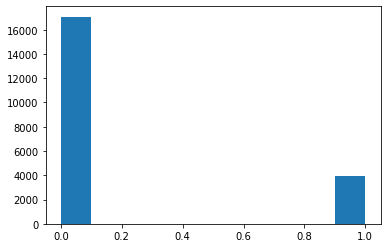

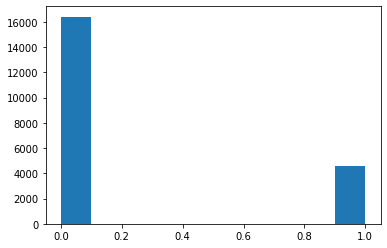

In [24]:
plt.hist(predictionsRF)
plt.show()
plt.hist(y_test)
plt.show();

In [25]:
cvRF = cross_val_score(RandomForestClassifier(max_depth=3), X_test, y_test, scoring='precision', cv=10)
print(cvRF)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [26]:
predictionsKN = modelKN.predict(X_test)
confmatKN = confusion_matrix(y_test,predictionsKN)
print(confmatKN)

[[14947  1456]
 [ 3790   807]]


misclassifications of both default an non-default seen

In [27]:
modelKN10 = KNeighborsClassifier(n_neighbors=10)
modelKN10.fit(X_train,y_train)
print(cross_val_score(modelKN10, X_train, y_train))
modelKN10.score(X_train,y_train)

[0.76611111 0.76       0.77666667 0.76777778 0.77166667]


0.7914444444444444

In [96]:
modelKN3 = KNeighborsClassifier(n_neighbors=3)
modelKN3.fit(X_train,y_train)
print(cross_val_score(modelKN3, X_train, y_train))
modelKN3.score(X_train,y_train)

[0.72888889 0.72166667 0.74277778 0.72       0.73611111]


0.8436666666666667

In [29]:
modelKN2 = KNeighborsClassifier(n_neighbors=2)
modelKN2.fit(X_train,y_train)
print(cross_val_score(modelKN2, X_train, y_train))
modelKN2.score(X_train,y_train)

[0.76166667 0.75555556 0.76611111 0.75       0.75555556]


0.8406666666666667

In [30]:
predictionsKN2 = modelKN2.predict(X_test)
confmatKN2 = confusion_matrix(y_test,predictionsKN2)
print(confmatKN2)

[[15521   882]
 [ 4117   480]]


Very large % of defaults classified as non-defaults, more innacurate default hits than accurate

In [31]:
modelSVC = SVC()
modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train,y_train)

[0.77333333 0.77333333 0.77333333 0.77333333 0.77388889]


0.774

In [32]:
predictionsSVC = modelSVC.predict(X_test)
confmatSVC = confusion_matrix(y_test,predictionsSVC)
print(confmatSVC)
accuracy_score(y_test, predictionsSVC)

[[16403     0]
 [ 4596     1]]


0.7811428571428571

In [33]:
modelSVCT = SVC(probability=True)
modelSVCT.fit(X_train,y_train)
print(cross_val_score(modelSVCT, X_train, y_train))
modelSVCT.score(X_train,y_train)

#Pred+score
predictionsSVCT = modelSVCT.predict(X_test)
confmatSVCT = confusion_matrix(y_test,predictionsSVCT)
print(confmatSVCT)
accuracy_score(y_test, predictionsSVCT)

[0.77333333 0.77333333 0.77333333 0.77333333 0.77388889]
[[16403     0]
 [ 4596     1]]


0.7811428571428571

in this universe, no one defaults. let's not use that, then.

# Manual Feature Selection - No demographics

In [35]:
df1 = pd.read_csv('/Users/johnmiller/Downloads/default of credit card clients.csv')
df1 = df1.rename(columns={'default payment next month':"DEFAULT"})
df1 = df1.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'ID', 'AGE'], axis=1)
df1.head

<bound method NDFrame.head of        LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0          20000      2      2     -1     -1     -2     -2       3913   
1         120000     -1      2      0      0      0      2       2682   
2          90000      0      0      0      0      0      0      29239   
3          50000      0      0      0      0      0      0      46990   
4          50000     -1      0     -1      0      0      0       8617   
...          ...    ...    ...    ...    ...    ...    ...        ...   
29995     220000      0      0      0      0      0      0     188948   
29996     150000     -1     -1     -1     -1      0      0       1683   
29997      30000      4      3      2     -1      0      0       3565   
29998      80000      1     -1      0      0      0     -1      -1645   
29999      50000      0      0      0      0      0      0      47929   

       BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0           3102   

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   PAY_0      30000 non-null  int64
 2   PAY_2      30000 non-null  int64
 3   PAY_3      30000 non-null  int64
 4   PAY_4      30000 non-null  int64
 5   PAY_5      30000 non-null  int64
 6   PAY_6      30000 non-null  int64
 7   BILL_AMT1  30000 non-null  int64
 8   BILL_AMT2  30000 non-null  int64
 9   BILL_AMT3  30000 non-null  int64
 10  BILL_AMT4  30000 non-null  int64
 11  BILL_AMT5  30000 non-null  int64
 12  BILL_AMT6  30000 non-null  int64
 13  PAY_AMT1   30000 non-null  int64
 14  PAY_AMT2   30000 non-null  int64
 15  PAY_AMT3   30000 non-null  int64
 16  PAY_AMT4   30000 non-null  int64
 17  PAY_AMT5   30000 non-null  int64
 18  PAY_AMT6   30000 non-null  int64
 19  DEFAULT    30000 non-null  int64
dtypes: int64(20)
memory usage: 4.6 MB


In [37]:
df1.iloc[:,1:7] += 2
df1.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,4,4,1,1,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,1,4,2,2,2,4,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,2,2,2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,2,2,2,2,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,2,2,2,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [38]:
y1 = df1['DEFAULT']
x1 = df.iloc[:,0:18]
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.75)

In [39]:
modelRF41 = RandomForestClassifier(max_depth=4)
modelRF41.fit(X_train1,y_train1)
print(cross_val_score(modelRF41, X_train1, y_train1))
modelRF41.score(X_train1,y_train1)

[0.818      0.83733333 0.82666667 0.83133333 0.81933333]


0.8294666666666667

In [40]:
modelRF151 = RandomForestClassifier(max_depth=20)
modelRF151.fit(X_train1,y_train1)
print(cross_val_score(modelRF151, X_train1, y_train1))
modelRF151.score(X_train1,y_train1)

[0.814      0.83666667 0.82133333 0.81333333 0.81266667]


0.9745333333333334

In [41]:
predictionsRF1 = modelRF151.predict(X_test1)
confmatRF1 = confusion_matrix(y_test1,predictionsRF1)
print(confmatRF1)
accuracy_score(y_test1, predictionsRF1)

[[16527   890]
 [ 3364  1719]]


0.8109333333333333

973 false defaults, and more missed defaults than the one-hot full set
Also unclear why the accuracy is so much lower using test sets

In [42]:
modelSVC1 = SVC()
modelSVC1.fit(X_train1,y_train1)
print(cross_val_score(modelSVC1, X_train1, y_train1))
modelSVC1.score(X_train1,y_train1)

[0.79333333 0.79333333 0.79266667 0.79266667 0.79266667]


0.7930666666666667

In [66]:
modelSVC2 = SVC(C=100)
modelSVC2.fit(X_train1,y_train1)
print(cross_val_score(modelSVC2, X_train1, y_train1))
modelSVC2.score(X_train1,y_train1)

[0.78533333 0.79066667 0.78933333 0.79       0.79066667]


0.7974666666666667

In [49]:
predictionsSVC2 = modelSVC2.predict(X_test1)
confmatSVC2 = confusion_matrix(y_test1,predictionsSVC2)
print(confmatSVC2)
accuracy_score(y_test1, predictionsSVC2)

[[17338    79]
 [ 5064    19]]


0.7714222222222222

Low detection of defaults

# PCA

SVM and KNN both respond well to PCA. let's try that

In [50]:
from sklearn.decomposition import PCA

In [85]:
dfreduced = PCA(n_components=5).fit_transform(X_train)
dfreduced

array([[ -62051.27429247,  -88531.87920606,   -4977.41012326,
          20004.15782005,   -5134.89043439],
       [  40926.72195262, -101780.09761698,  -11194.65740247,
          28286.66296823,   -5617.58994366],
       [  36312.98203125,  -63953.89338423,    6326.41338391,
         -24420.03976976,   -7779.63535798],
       ...,
       [-154227.7489459 ,  -46815.54063877,    1510.07533609,
          -1474.90115039,   -2166.90589383],
       [ -39687.3742836 ,  -89981.52248937,  -18985.31097372,
          26590.19330451,    7191.39505076],
       [ -91711.06046354,   44602.99901013,    6325.94994691,
          -7458.96943715,   -5173.91250026]])

In [76]:
modelSVCP1 = SVC(C=0.1)
modelSVCP1.fit(dfreduced,y_train)
print(cross_val_score(modelSVCP1, dfreduced, y_train))
modelSVCP1.score(dfreduced,y_train)

[0.77333333 0.77333333 0.77333333 0.77333333 0.77388889]


0.7734444444444445

In [78]:
modelSVCP11 = SVC(C=1)
modelSVCP11.fit(dfreduced,y_train)
print(cross_val_score(modelSVCP11, dfreduced, y_train))
modelSVCP11.score(dfreduced,y_train)

[0.77333333 0.77333333 0.77333333 0.77333333 0.77388889]


0.7741111111111111

In [86]:
dfreduced1 = PCA(n_components=5).fit_transform(X_train1)
dfreduced1

array([[   -898.06857042,   -9894.386687  ,   40740.854692  ,
           4252.05404255,   -5582.91810767],
       [ 192407.72018299, -131388.28857934,   -9327.88692756,
           -957.42655622,  -10445.19449118],
       [ 178362.97035148,  319753.0315434 , -148217.32702136,
         -99283.19021673,   76577.54404482],
       ...,
       [  66832.16039818,  252674.13845356,  -43581.15831511,
         -23297.3171767 ,   13396.8884963 ],
       [-130594.6495156 ,  -96435.53362344,   -7781.48956054,
            408.9650917 ,    3140.34067497],
       [-103309.45956326, -100512.7297473 ,   -8129.3191103 ,
          -1848.84222773,   -2062.30286179]])

In [87]:
modelSVCP2 = SVC(C=0.1)
modelSVCP2.fit(dfreduced1,y_train1)
print(cross_val_score(modelSVCP1, dfreduced1, y_train1))
modelSVCP2.score(dfreduced1,y_train1)

[0.79333333 0.79333333 0.79266667 0.79266667 0.79266667]


0.7929333333333334

Better performance of PCA on the reduced set, else held constant.

In [88]:
modelRFP1 = RandomForestClassifier(max_depth=3)
modelRFP1.fit(dfreduced,y_train)
print(cross_val_score(modelRFP1, dfreduced, y_train))
modelRFP1.score(dfreduced,y_train)

[0.77333333 0.77333333 0.77333333 0.77333333 0.77388889]


0.7734444444444445

In [89]:
modelRFP2 = RandomForestClassifier(max_depth=10)
modelRFP2.fit(dfreduced,y_train)
print(cross_val_score(modelRFP2, dfreduced, y_train))
modelRFP2.score(dfreduced,y_train)

[0.77722222 0.77388889 0.77777778 0.77277778 0.77833333]


0.8072222222222222

In [90]:
modelRFP3 = RandomForestClassifier(max_depth=3)
modelRFP3.fit(dfreduced1,y_train1)
print(cross_val_score(modelRFP3, dfreduced1, y_train1))
modelRFP3.score(dfreduced1,y_train1)

[0.79333333 0.79333333 0.79266667 0.79266667 0.79266667]


0.7929333333333334

random forest did not respond well to PCA, but that makes sense